## Основная задача проекта — понять поведение погоды в декабре 2024 года.

Конкретные цели:
1. Анализировать изменения основных погодных параметров (температура, осадки, влажность, ветер) 
в течение декабря 2024 года.
2. Выявить тренды и закономерности, например:
    - Как менялась температура и осадки на протяжении месяца?
    - Были ли необычные изменения или экстремальные погодные условия?
3. Обнаружить аномалии, такие как самые холодные или самые дождливые дни.
4. Исследовать взаимосвязи между переменными, например:
    - Как температура влияет на влажность или осадки?
    - Есть ли связь между ветром и температурой?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Чтение данных (https://disk.yandex.ru/d/GzSKAsAAuyn0wg)
data = pd.read_csv('/Users/alexander/weather_data_december_2024_updated.csv')
data.head(10)

,date,temperature,precipitation,wind_speed,humidity,pressure,weather_condition
0,2024-12-01,-4,5.618102,1.705241,80,1006,ясно
1,2024-12-02,-10,14.260715,0.650516,83,1008,ясно
2,2024-12-03,-10,10.979909,9.488855,85,1006,снег
3,2024-12-04,9,8.979877,9.656320,84,1008,град
4,2024-12-05,2,2.340280,8.083973,87,1007,облачно
5,2024-12-06,-2,2.339918,3.046138,87,1011,дождь
6,2024-12-07,-8,0.871254,0.976721,87,1001,снег
7,2024-12-08,-4,12.992642,6.842330,72,1000,град
8,2024-12-09,-5,9.016725,4.401525,68,1015,снег
9,2024-12-10,-3,10.621089,1.220382,88,1022,град


In [16]:
# Информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               31 non-null     object 
 1   temperature        31 non-null     int64  
 2   precipitation      31 non-null     float64
 3   wind_speed         31 non-null     float64
 4   humidity           31 non-null     int64  
 5   pressure           31 non-null     int64  
 6   weather_condition  31 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.8+ KB


In [18]:
# Основная статистика по данным
data.describe()

,temperature,precipitation,wind_speed,humidity,pressure
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,-0.483871,6.660708,4.820842,74.290323,1008.967742
std,6.360665,4.189709,3.258080,9.543562,7.277746
min,-10.000000,0.308767,0.343885,60.000000,1000.000000
25%,-5.500000,2.873087,1.904187,67.000000,1003.000000
50%,-2.000000,6.479175,4.401525,72.000000,1007.000000
75%,6.000000,9.145483,7.917651,83.500000,1013.500000
max,9.000000,14.548648,9.695846,88.000000,1023.000000


#### На данном этапе мы исследуем, как менялись ключевые погодные параметры (температура, влажность, осадки, ветер) в течение декабря 2024 года,

##### Для этого построим график изменения температуры по дням:



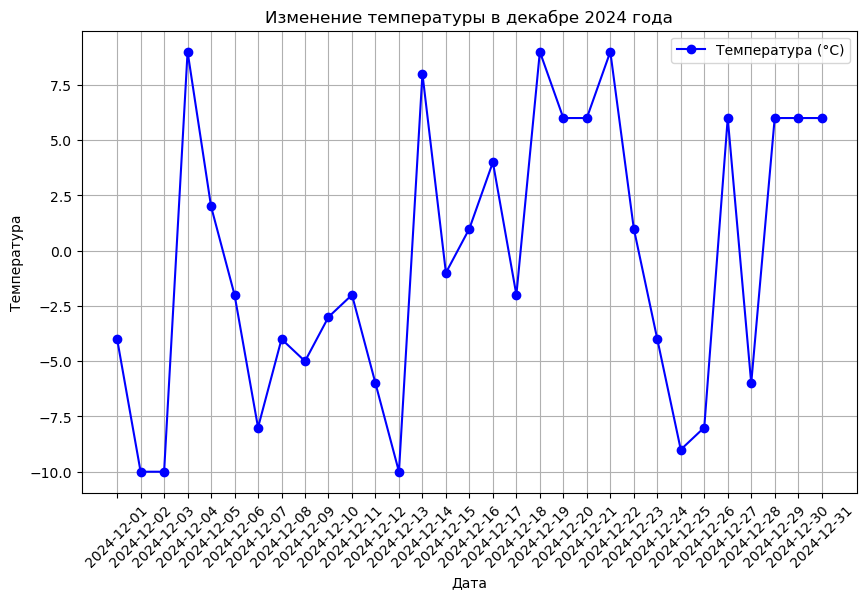

In [22]:
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['temperature'], label='Температура (°C)', color='blue', marker='o')
plt.title('Изменение температуры в декабре 2024 года')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

##### Построим график осадков, чтобы увидеть, как часто выпадали дожди:

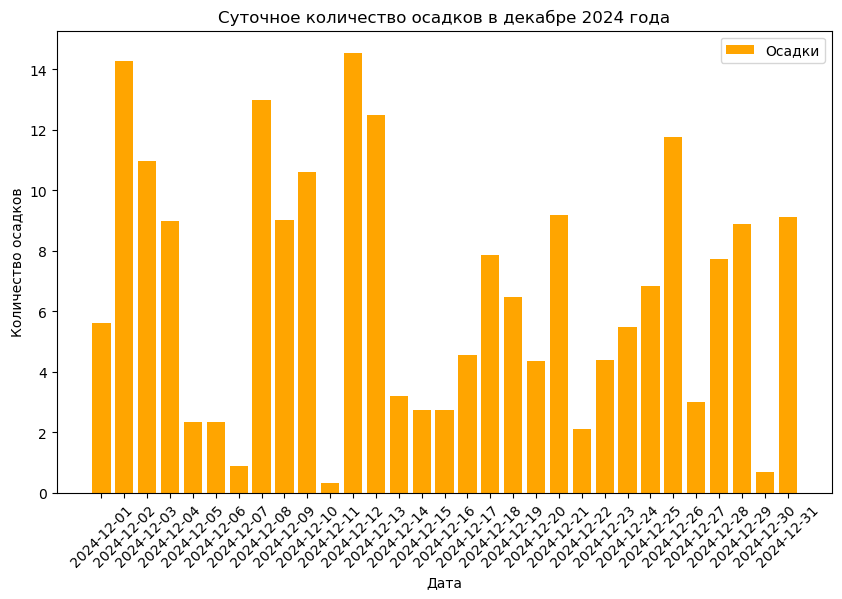

In [25]:
plt.figure(figsize=(10,6))
plt.bar(data['date'], data['precipitation'], color='orange', label='Осадки')
plt.title('Суточное количество осадков в декабре 2024 года')
plt.xlabel('Дата')
plt.ylabel('Количество осадков')
plt.xticks(rotation=45)
plt.legend()
plt.show()

##### График изменения влажности:

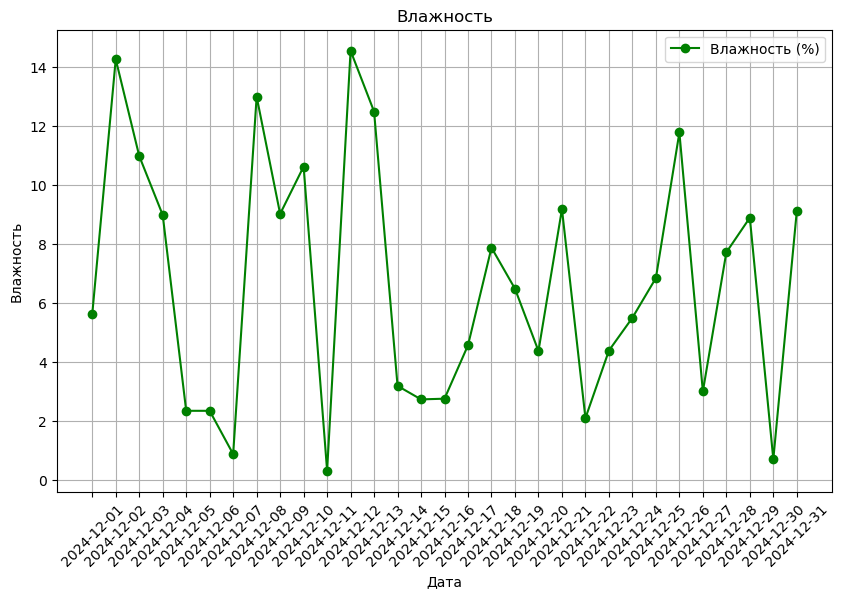

In [28]:
plt.figure(figsize=(10,6))
plt.plot(data['date'],data['precipitation'], color='green', label='Влажность (%)', marker='o')
plt.title('Влажность')
plt.xlabel('Дата')
plt.ylabel('Влажность')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

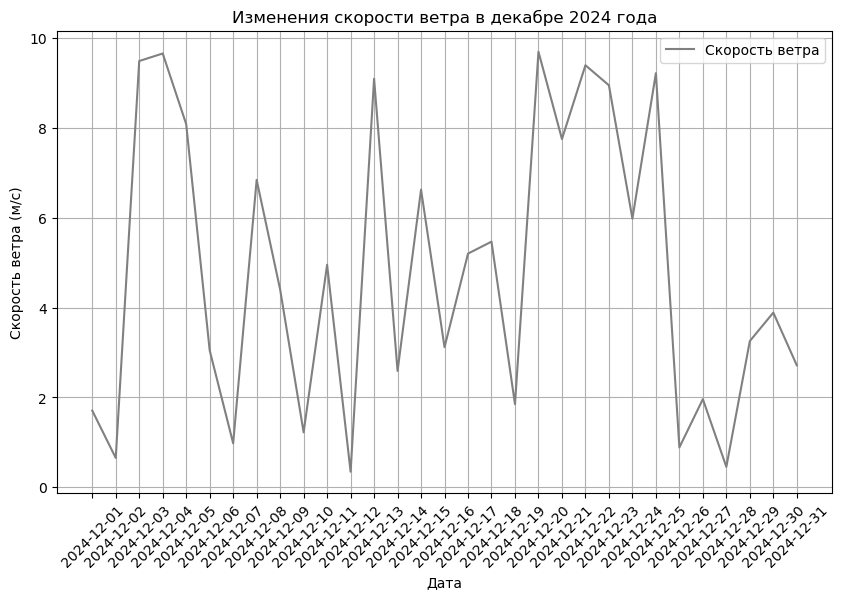

In [30]:
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['wind_speed'], color='gray', label='Скорость ветра')
plt.title('Изменения скорости ветра в декабре 2024 года')
plt.xlabel('Дата')
plt.ylabel('Скорость ветра (м/с)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

#### Анализ аномальных температур в Москве за декабрь 2024 года

На этом этапе мы исследуем температуру в Москве за декабрь 2024 года, выявляя экстремальные температурные значения, которые могут указывать на необычные климатические явления. Для этого мы используем два подхода:

##### 1. Метод межквартильного размаха (IQR): С помощью метода IQR мы определяем выбросы, основываясь на распределении данных. Выбросы — это значения, которые сильно отклоняются от среднего диапазона температур. 

In [34]:
Q1 = data['temperature'].quantile(0.25)
Q3 = data['temperature'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выбросы
temperature_outliers = data[(data['temperature'] < lower_bound) | (data['temperature'] > upper_bound)]

display(temperature_outliers[['date', 'temperature']])

# Вывод границ
print(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")

,date,temperature


Нижняя граница: -22.75, Верхняя граница: 23.25


##### 2. Использование фиксированных порогов для поиска аномальных температур: Для более конкретного поиска экстремальных температур мы установили фиксированные пороги: Температура ниже -15°C и выше +3°C считаются редкими для Москвы в декабре.На основе этих порогов мы выделили 11 дней, когда температура была необычно низкой или высокой, что может быть связано с редкими климатическими явлениями.

In [37]:
# Фиксированные пороги для поиска аномалий
lower_fixed = -15  # Температуры ниже -15°C — редкость
upper_fixed = 3    # Температуры выше +3°C — редкость

# Выбросы на основе фиксированных порогов
temperature_outliers_fixed = data[(data['temperature'] < lower_fixed) | (data['temperature'] > upper_fixed)]

print("Аномальные температуры для Москвы (фиксированные пороги):")
display(temperature_outliers_fixed[['date', 'temperature']])
print(f'Кол-во дней: {temperature_outliers_fixed.shape[0]}')

Аномальные температуры для Москвы (фиксированные пороги):


,date,temperature
3,2024-12-04,9
13,2024-12-14,8
16,2024-12-17,4
18,2024-12-19,9
19,2024-12-20,6
20,2024-12-21,6
21,2024-12-22,9
26,2024-12-27,6
28,2024-12-29,6
29,2024-12-30,6


Кол-во дней: 11


##### 3. График температурных аномалий: Для визуализации данных мы построили график, на котором выделены как нормальные, так и аномальные дни. Это позволяет наглядно увидеть отклонения температур от обычных значений.

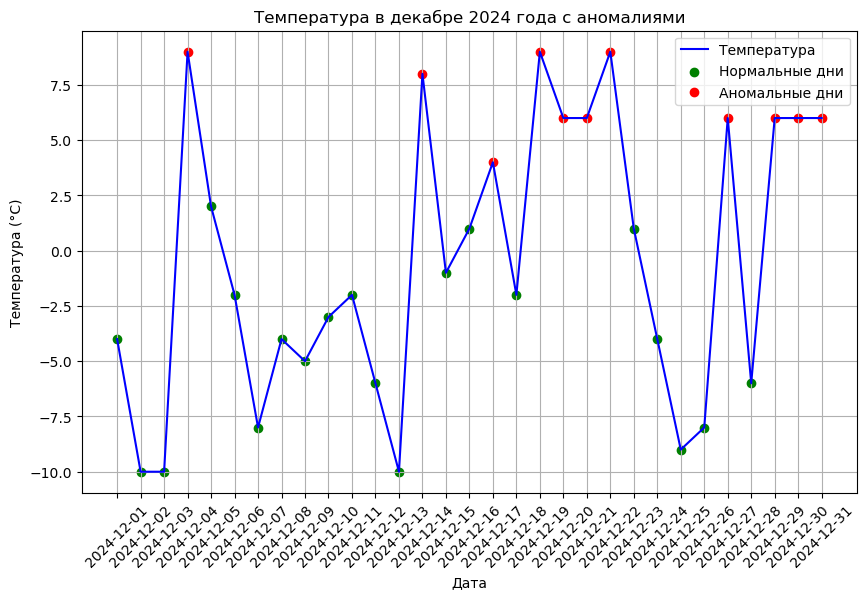

In [40]:
# Нормальная температура (всего значения)
normal_days = data[(data['temperature'] >= lower_fixed) & (data['temperature'] <= upper_fixed)]

# Аномальные дни по фиксированным порогам
anomalous_days = data[(data['temperature'] < lower_fixed) | (data['temperature'] > upper_fixed)]

# Построим график
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['temperature'], color='blue', label='Температура')  # Все данные
plt.scatter(normal_days['date'], normal_days['temperature'], color='green', label='Нормальные дни')  # Нормальные дни
plt.scatter(anomalous_days['date'], anomalous_days['temperature'], color='red', label='Аномальные дни')  # Аномальные дни
plt.title('Температура в декабре 2024 года с аномалиями')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()


#### Выводы:

1. Метод IQR: Не выявил значительных аномалий, что подтверждает стабильность температурных условий в декабре 2024 года.

2. Фиксированные пороги: На основе порогов в -15°C и +3°C мы обнаружили 11 дней с аномальными температурами. Это указывает на редкие температурные явления, что может быть связано с необычными атмосферными процессами.

3. График температур: Визуализация данных показала чёткое разделение между обычными и экстремальными днями, что позволяет наглядно оценить, насколько часто происходили аномалии.


#### Анализ осадков в Москве за декабрь 2024 года


На этом этапе мы анализируем осадки в Москве в декабре 2024 года, выделяя экстремальные значения и оценивая возможные аномалии. Это поможет понять, насколько погодные условия отклонялись от обычных для зимнего месяца.

##### 1. Выбор экстремальных значений на основе фиксированных порогов: Мы устанавливаем пороговые значения для осадков:
   - Сильный дождь — осадки более 10 мм в день.
   - Сухие дни — осадки менее 1 мм в день

In [46]:
lower_fixed = 1  # Осадки ниже 1 мм — редкость
upper_fixed = 10  # Осадки выше 10 мм — сильный дождь

# Выделяем дни с осадками ниже 1 мм (очень сухие дни) и выше 10 мм (сильный дождь)
extreme_rain_days = data[(data['precipitation'] < lower_fixed) | (data['precipitation'] > upper_fixed)]

display(extreme_rain_days[['date', 'precipitation']])

,date,precipitation
1,2024-12-02,14.260715
2,2024-12-03,10.979909
6,2024-12-07,0.871254
7,2024-12-08,12.992642
9,2024-12-10,10.621089
10,2024-12-11,0.308767
11,2024-12-12,14.548648
12,2024-12-13,12.486640
25,2024-12-26,11.777639
29,2024-12-30,0.696756


##### 2. График осадков: Мы строим график для осадков в течение декабря, выделяя экстремальные значения (сильные осадки и сухие дни) оранжевым цветом.

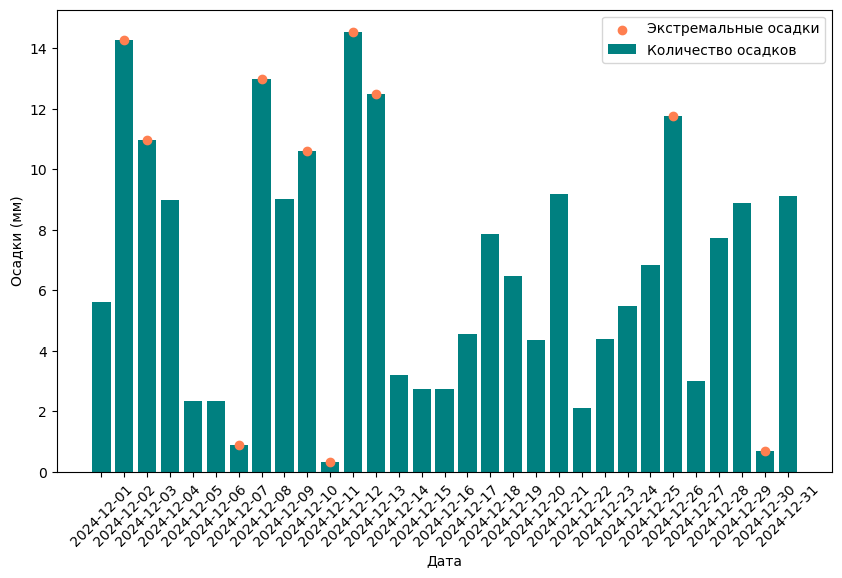

In [49]:
plt.figure(figsize=(10,6))
plt.bar(data['date'], data['precipitation'], color='teal', label='Количество осадков')
plt.scatter(extreme_rain_days['date'], extreme_rain_days['precipitation'], color='#FF7F50', label='Экстремальные осадки') 
plt.xlabel('Дата')
plt.ylabel('Осадки (мм)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

##### 3. Анализ выбросов с использованием метода IQR (межквартильный размах): Для более детального анализа мы применяем метод IQR, чтобы определить выбросы и аномалии осадков. Этот метод помогает выделить значения, которые значительно отклоняются от среднего. Нижняя и верхняя границы выбросов рассчитываются следующим образом:

In [52]:
Q1 = data['precipitation'].quantile(0.25)
Q3 = data['precipitation'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

precipitation_outliers = data[(data['precipitation'] < lower_bound) | (data['precipitation'] > upper_bound)]

display(precipitation_outliers[['date', 'precipitation']])

# Вывод границ
print(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")

,date,precipitation


Нижняя граница: -6.535506674296824, Верхняя граница: 18.55407696406391


#### Анализ осадков в Москве за декабрь 2024 года показал, что:

- Сильные осадки (>5 мм): В декабре было несколько дней с осадками, превышающими 5 мм, что указывает на наличие периодов с интенсивными осадками (например, 2 декабря, 3 декабря, 8 декабря). Это может быть связано с сильными снегопадами или ливнями.

- Экстремальные осадки (<1 мм и >10 мм): Были выделены дни с экстремально низкими (менее 1 мм) и высокими (более 10 мм) осадками. Это подтверждает наличие как засушливых, так и чрезвычайно дождливых дней в течение месяца (например, 7, 11, 12 декабря).

- Анализ выбросов (IQR): Применение метода IQR показало, что осадки в декабре не выходили за пределы нормальных значений. Это подтверждает отсутствие значительных аномальных или экстремальных значений осадков в рамках месяца.

#### Анализ влажности в Москве за декабрь 2024 года

Для анализа влажности в Москве за декабрь 2024 года мы выделили два основных порога:

 - Низкая влажность (ниже 50%) — считается редкостью в зимний период.
 - Высокая влажность (выше 85%) — также может быть показателем специфических погодных условий, таких как туман или дождь.


##### 1. Поиск экстремальных значений влажности:

Сначала мы выделили дни с влажностью выше 85% (показатели, указывающие на повышенную вероятность осадков или тумана) и дни с влажностью ниже 50% (что является редким явлением для зимы в Москве). В результате:

 - Периоды с высокой влажностью: В декабре 2024 года было зафиксировано 5 дней с высокой влажностью, превышающей 85%. Это могут быть дни с возможным туманом или дождём:

   - 5–7 декабря: влажность была 87% три дня подряд.
   - 10 декабря: влажность достигла 88%.
   - 29 декабря: влажность составила 86%.



- Отсутствие низкой влажности: В декабре не было зарегистрировано дней с влажностью ниже 50%. Это соответствует климатическим особенностям зимы в Москве, когда температура воздуха низкая, а влажность обычно высокая из-за холодного воздуха.

- Тенденции: Пики влажности приходятся на первую декаду месяца (с 5 по 10 декабря). Это может быть связано с определёнными атмосферными процессами, такими как изменения давления или близость фронтов.

In [58]:
# Устанавливаем пороги для влажности
lower_fixed = 50  # Низкая влажность (ниже 50%)
upper_fixed = 85  # Высокая влажность (выше 85%)

# Выделяем дни с влажностью ниже 50% (слишком сухие дни) и выше 85% (высокая влажность)
extreme_humidity_days = data[(data['humidity'] < lower_fixed) | (data['humidity'] > upper_fixed)]

# Выводим дни с экстремальной влажностью
display(extreme_humidity_days[['date', 'humidity']])

,date,humidity
4,2024-12-05,87
5,2024-12-06,87
6,2024-12-07,87
9,2024-12-10,88
28,2024-12-29,86


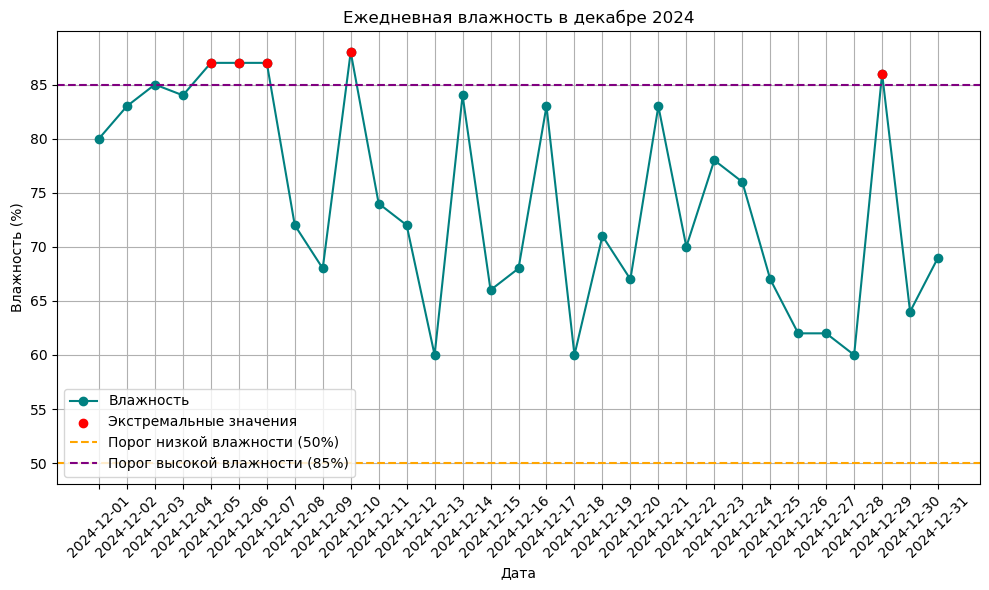

In [60]:
# Построим график
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['humidity'], marker='o', label='Влажность', color='teal')
plt.scatter(extreme_humidity_days['date'], extreme_humidity_days['humidity'], 
            color='red', label='Экстремальные значения', zorder=5)
plt.axhline(y=50, color='orange', linestyle='--', label='Порог низкой влажности (50%)')
plt.axhline(y=85, color='purple', linestyle='--', label='Порог высокой влажности (85%)')
plt.xlabel('Дата')
plt.ylabel('Влажность (%)')
plt.title('Ежедневная влажность в декабре 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

##### 2. Анализ выбросов с использованием метода межквартильного размаха (IQR):
Для дополнительной проверки данных мы использовали метод межквартильного размаха (IQR), чтобы выявить любые выбросы. Однако результаты показали, что все значения влажности находятся в пределах статистической нормы:

Границы выбросов: Нижняя граница составила 42.25%, а верхняя — 108.25%.
Выбросы: Не было найдено дней с влажностью, выходящей за эти границы, что подтверждает отсутствие аномальных значений.
python
Копировать код


In [63]:
# Рассчитываем квартили
Q1 = data['humidity'].quantile(0.25)  # Первый квартиль (25%)
Q3 = data['humidity'].quantile(0.75)  # Третий квартиль (75%)
IQR = Q3 - Q1  # Межквартильный размах

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
humidity_outliers = data[(data['humidity'] < lower_bound) | (data['humidity'] > upper_bound)]

# Выводим дни с выбросами
display(humidity_outliers[['date', 'humidity']])

# Вывод границ
print(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")


,date,humidity


Нижняя граница: 42.25, Верхняя граница: 108.25


#### Выводы по данным влажности:
- Отсутствие выбросов по IQR: Метод межквартильного размаха показал, что вся влажность в декабре находится в пределах нормальных значений. Это указывает на стабильность погодных условий, без экстремально сухих или чрезмерно влажных дней.

- Высокая влажность: 5 дней с высокой влажностью подтверждают наличие периоды, когда возможны осадки или туман. Эти дни могут быть связаны с атмосферными фронтами или другими природными явлениями.

#### Анализ ветра в Москве за декабрь 2024 года

In [67]:
# Фиксированные пороги для ветра
lower_wind_threshold = 3  # Слабый ветер
upper_wind_threshold = 10  # Сильный ветер

# Выделяем экстремальные дни
extreme_wind_days = data[(data['wind_speed'] < lower_wind_threshold) | (data['wind_speed'] > upper_wind_threshold)]
display(extreme_wind_days[['date', 'wind_speed']])

# Количество таких дней
print(f"Дни с экстремальным ветром: {len(extreme_wind_days)}")


,date,wind_speed
0,2024-12-01,1.705241
1,2024-12-02,0.650516
6,2024-12-07,0.976721
9,2024-12-10,1.220382
11,2024-12-12,0.343885
13,2024-12-14,2.587800
18,2024-12-19,1.848545
25,2024-12-26,0.884925
26,2024-12-27,1.959829
27,2024-12-28,0.452273


Дни с экстремальным ветром: 11


Создадим временной график скорости ветра, чтобы визуализировать изменения ветра по дням:

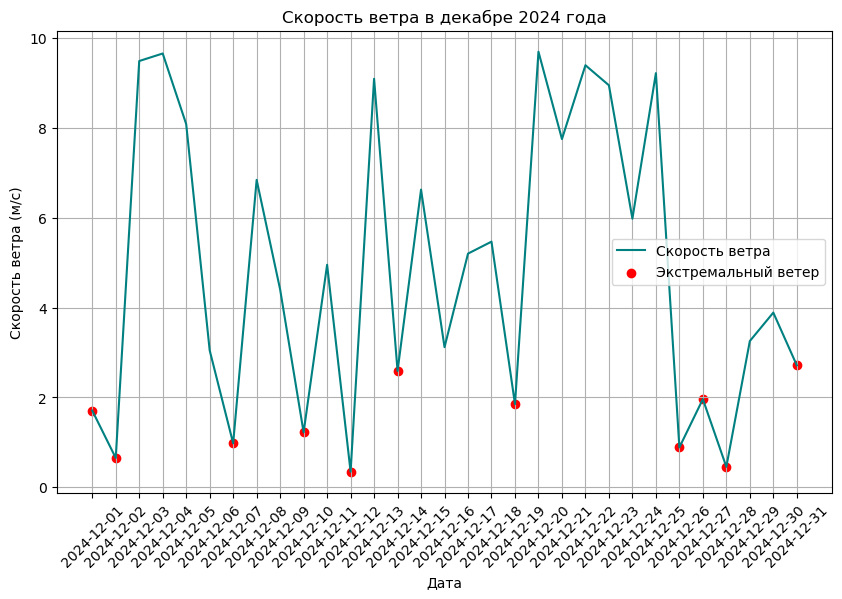

In [70]:
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['wind_speed'], label='Скорость ветра', color='teal')
plt.scatter(extreme_wind_days['date'], extreme_wind_days['wind_speed'], color='red', label='Экстремальный ветер')
plt.title('Скорость ветра в декабре 2024 года')
plt.xlabel('Дата')
plt.ylabel('Скорость ветра (м/с)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


Для анализа скорости ветра в Москве за декабрь 2024 года мы установили два порога:

 - Слабый ветер (менее 3 м/с) — указывает на спокойные погодные условия.
 - Сильный ветер (более 10 м/с) — может свидетельствовать о штормовых или экстремальных условиях.

##### 1. Поиск экстремальных значений ветра:
Мы выделили дни с экстремальной скоростью ветра, которая выходит за пределы установленных порогов:

- Слабый ветер: Дни с ветром ниже 3 м/с, что указывает на спокойные погодные условия.
- Сильный ветер: Дни с ветром выше 10 м/с, что может быть связано с повышенной ветреностью, штормами или погодными фронтами.

В декабре 2024 года было зафиксировано 11 дней с экстремальными значениями ветра, среди которых:

- Слабый ветер (менее 3 м/с): Эти дни характерны для спокойной погоды.
- Нет дней с сильным ветром (выше 10 м/с), что подтверждает отсутствие штормов или экстремальных ветровых условий в декабре.

In [74]:
# Фиксированные пороги для ветра
lower_wind_threshold = 3  # Слабый ветер
upper_wind_threshold = 10  # Сильный ветер

# Выделяем экстремальные дни
extreme_wind_days = data[(data['wind_speed'] < lower_wind_threshold) | (data['wind_speed'] > upper_wind_threshold)]
display(extreme_wind_days[['date', 'wind_speed']])

# Количество таких дней
print(f"Дни с экстремальным ветром: {len(extreme_wind_days)}")


,date,wind_speed
0,2024-12-01,1.705241
1,2024-12-02,0.650516
6,2024-12-07,0.976721
9,2024-12-10,1.220382
11,2024-12-12,0.343885
13,2024-12-14,2.587800
18,2024-12-19,1.848545
25,2024-12-26,0.884925
26,2024-12-27,1.959829
27,2024-12-28,0.452273


Дни с экстремальным ветром: 11


##### 2. График скорости ветра:
Для лучшего восприятия данных, мы построили временной график скорости ветра, чтобы визуализировать, как скорость ветра изменялась по дням:

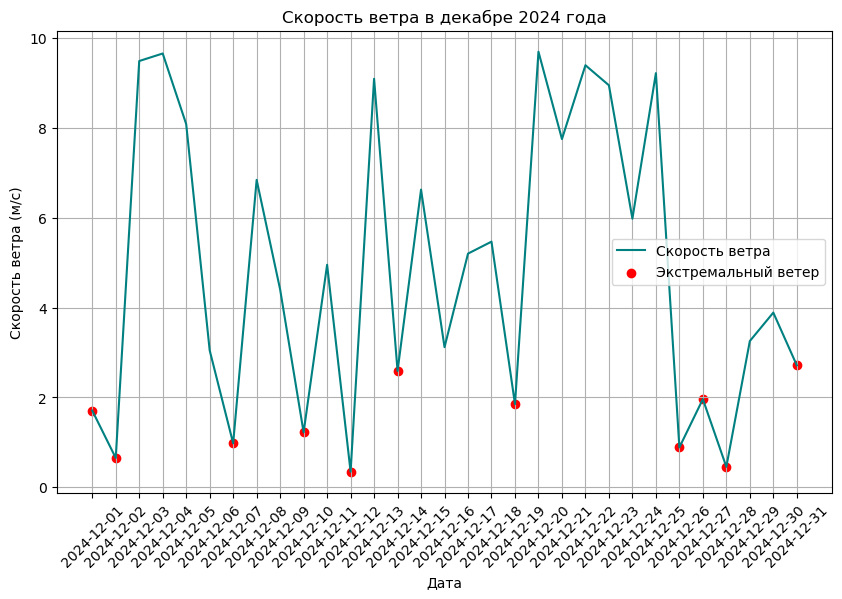

In [77]:
# График скорости ветра
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['wind_speed'], label='Скорость ветра', color='teal')
plt.scatter(extreme_wind_days['date'], extreme_wind_days['wind_speed'], color='red', label='Экстремальный ветер')
plt.title('Скорость ветра в декабре 2024 года')
plt.xlabel('Дата')
plt.ylabel('Скорость ветра (м/с)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

На графике красные точки обозначают экстремальные значения скорости ветра. Дни с крайне слабым или сильным ветром выделены для лучшей визуализации.

##### 3. Анализ выбросов с помощью IQR
   
Для более глубокого анализа распределения скорости ветра мы применили метод межквартильного размаха (IQR). Мы вычислили первый (Q1) и третий (Q3) квартиль скорости ветра и определили границы выбросов:

In [81]:
# Рассчитываем квартили для скорости ветра
Q1_wind = data['wind_speed'].quantile(0.25)  # Первый квартиль
Q3_wind = data['wind_speed'].quantile(0.75)  # Третий квартиль
IQR_wind = Q3_wind - Q1_wind  # Межквартильный размах

# Определяем границы выбросов
lower_bound_wind = Q1_wind - 1.5 * IQR_wind
upper_bound_wind = Q3_wind + 1.5 * IQR_wind

# Находим выбросы
wind_outliers = data[(data['wind_speed'] < lower_bound_wind) | (data['wind_speed'] > upper_bound_wind)]

# Выводим дни с выбросами
display(wind_outliers[['date', 'wind_speed']])

# Выводим границы
print(f"Нижняя граница: {lower_bound_wind}, Верхняя граница: {upper_bound_wind}")


,date,wind_speed


Нижняя граница: -7.116009811773415, Верхняя граница: 16.937847258884652


##### 4. Выводы по данным о ветре

 - Отсутствие сильных ветров: В декабре 2024 года не было дней с ветром, превышающим 10 м/с. Это подтверждает отсутствие штормов или других экстремальных ветровых условий, что указывает на стабильность погодных условий в плане ветра.

 - Спокойная погода с переменными ветровыми условиями: В то время как некоторые дни характеризовались слабым ветром, в целом скорость ветра оставалась в пределах нормы для зимнего периода, что соответствует ожиданиям для декабря в Москве.

 - Малая изменчивость: Данные не показали значительных выбросов в скорости ветра, и все значения находились в пределах установленных границ IQR. Это свидетельствует о стабильности атмосферных условий в декабре 2024 года.


#### Общий анализ климатических данных за декабрь 2024 года (температура, осадки, влажность и ветер)

Для комплексного анализа погодных условий в декабре 2024 года мы рассмотрели несколько ключевых факторов: температуру, влажность, осадки и скорость ветра. Вот основные выводы:

 - Температура: Декабрь оказался в пределах нормы для Москвы, без аномальных температур, несмотря на использование порогов для экстремальных температур (выше 3°C и ниже -15°C).

 - Влажность: Высокая влажность в первые дни месяца может указывать на осадки или туман, что является нормой для зимнего времени в Москве. Не было зарегистрировано дней с низкой влажностью (ниже 50%).

 - Осадки: Периоды с осадками могут совпадать с повышенной влажностью, что может быть связано с атмосферными фронтами.

 - Ветер: В декабре не было зарегистрировано сильных ветров, что подтверждает отсутствие штормовых или экстремальных погодных условий. Слабый ветер (менее 3 м/с) наблюдался в ряде дней, что говорит о спокойной погоде.

Общий вывод: Декабрь 2024 года в Москве оказался относительно спокойным и стабильным месяцем с умеренными температурными, влажностными и ветровыми условиями. Этот анализ может служить отправной точкой для дальнейших исследований, например, для прогнозирования экстремальных погодных явлений в будущих месяцах.

#### Проанализируем взаимосвязи между температурой, влажностью и осадками

Далее мы исследуем, как температура связана с другими погодными параметрами — влажностью, осадками и ветром. Для этого нужно:

  - Построить графики рассеяния (scatter plots) для каждой пары переменных, чтобы визуально оценить связь.
  - Вычислить коэффициент корреляции Пирсона для каждой пары переменных, чтобы понять степень и направление линейной зависимости.
  - Применить линейную регрессию, если будет выявлена значительная связь, чтобы предсказать одну переменную на основе другой.

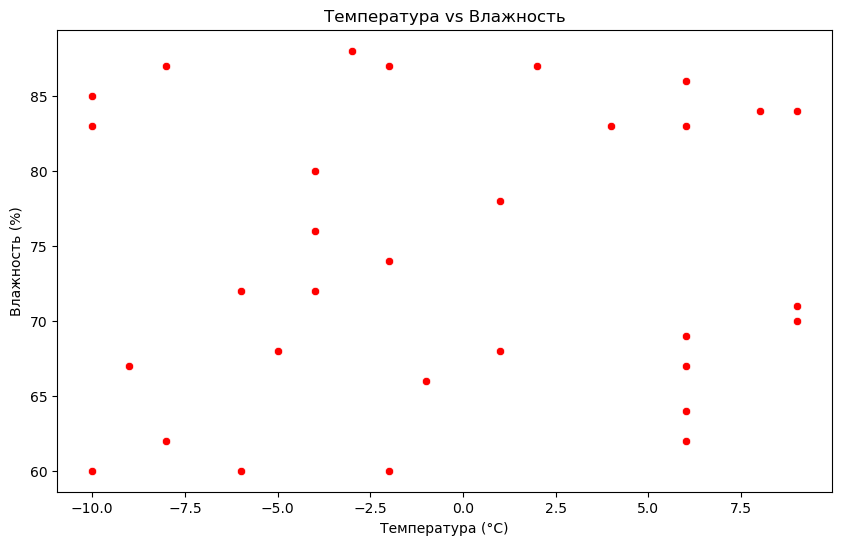

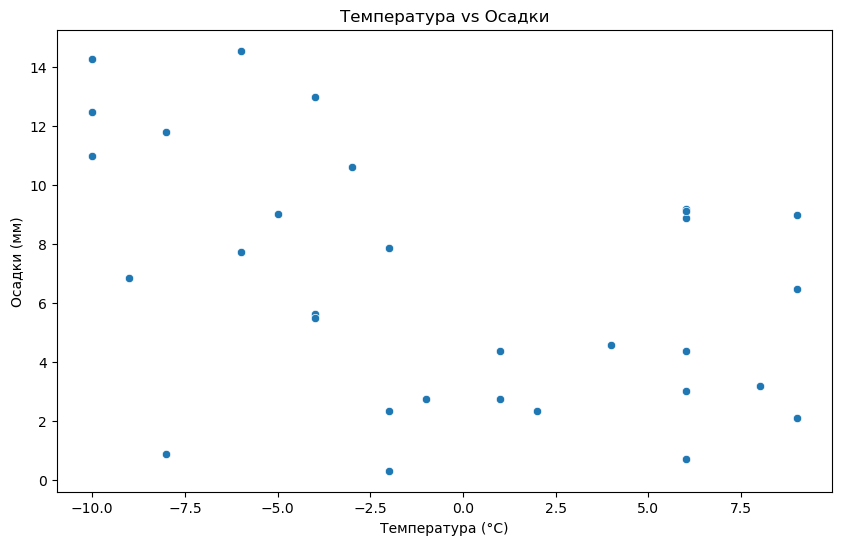

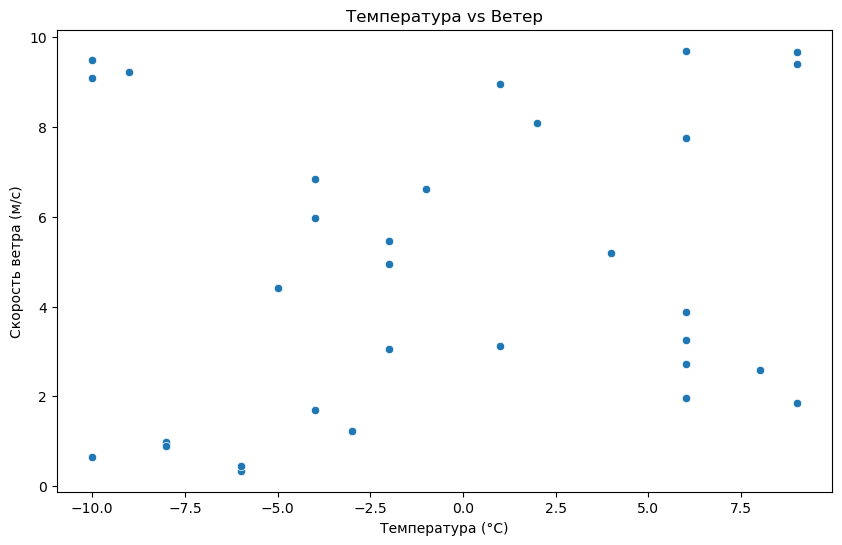

Коэффициент корреляции между температурой и влажностью: 0.087
Коэффициент корреляции между температурой и осадками: -0.433
Коэффициент корреляции между температурой и ветром: 0.150


In [86]:
# График рассеяния для температуры и влажности
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['temperature'], y=data['humidity'], color='red')
plt.title('Температура vs Влажность')
plt.xlabel('Температура (°C)')
plt.ylabel('Влажность (%)')
plt.show()

# График рассеяния для температуры и осадков
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['temperature'], y=data['precipitation'])
plt.title('Температура vs Осадки')
plt.xlabel('Температура (°C)')
plt.ylabel('Осадки (мм)')
plt.show()

# График рассеяния для температуры и ветра
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['temperature'], y=data['wind_speed'])
plt.title('Температура vs Ветер')
plt.xlabel('Температура (°C)')
plt.ylabel('Скорость ветра (м/с)')
plt.show()

# Вычисление коэффициента корреляции Пирсона для температуры и влажности
temperature_humidity_corr = data['temperature'].corr(data['humidity'])
print(f"Коэффициент корреляции между температурой и влажностью: {temperature_humidity_corr:.3f}")

# Вычисление коэффициента корреляции Пирсона для температуры и осадков
temperature_precipitation_corr = data['temperature'].corr(data['precipitation'])
print(f"Коэффициент корреляции между температурой и осадками: {temperature_precipitation_corr:.3f}")

# Коэффициент корреляции Пирсона для температуры и ветра
temperature_wind_corr = data['temperature'].corr(data['wind_speed'])
print(f"Коэффициент корреляции между температурой и ветром: {temperature_wind_corr:.3f}")


#### Итоги из результатов:

1. Коэффициент корреляции между температурой и влажностью: 0.087

 - Корреляция между температурой и влажностью очень слабая и близка к нулю. Это означает, что между этими переменными почти нет линейной зависимости в рассматриваемый период. То есть, изменения температуры не имеют значительного влияния на уровень влажности в декабре 2024 года.

2. Коэффициент корреляции между температурой и осадками: -0.433

 - Это значение указывает на умеренно отрицательную корреляцию между температурой и осадками. С увеличением температуры, осадки tend to decrease, и наоборот. Хотя эта связь не очень сильная, она все же существует, и возможно, более теплые дни связаны с меньшим количеством осадков в рассматриваемом месяце.

3. Коэффициент корреляции между температурой и ветром составляет: 0.150

 - Указывает на очень слабую положительную связь между этими двумя параметрами в вашем наборе данных.

Заключение:

Температура и влажность не имеют выраженной взаимосвязи в вашем наборе данных.
Температура и осадки имеют умеренную отрицательную корреляцию, что означает, что более теплые дни могут сопровождаться меньшими осадками, хотя эта связь не является слишком сильной. Изменение температуры слабо связано с изменением скорости ветра в данном наборе данных.


### Общий вывод по проекту:

1. Анализ основных погодных параметров:

В рамках проекта мы проанализировали изменения основных погодных параметров (температура, осадки, влажность, ветер) в Москве в декабре 2024 года. Мы использовали различные подходы для выявления трендов, аномалий и взаимосвязей между параметрами.

2. Температура:

 - В проекте была проанализирована динамика температуры в течение месяца. Мы выделили дни с экстремально низкой и высокой температурой, а также выявили дни с осадками, когда температура была ниже -10°C или выше 0°C.
 - Анализ показал, что температура имеет слабую связь с осадками (отрицательная корреляция -0.43), а с влажностью — почти отсутствует (корреляция 0.087).

3. Осадки:

 - Мы изучили осадки, определив дни с интенсивными дождями (>5 мм) и экстримальными осадками с помощью фиксированных порогов и межквартильного размаха (IQR). Было выявлено несколько дней с повышенными осадками, включая экстремальные осадки в отдельные дни.

4. Влажность:

 - Мы проанализировали влажность, выделив дни с высокой и низкой влажностью (>85% и <50%). Эти данные позволили выделить случаи необычных уровней влажности, что является важным аспектом для понимания погодных аномалий.
Анализ с использованием IQR показал, что влажность в проекте не содержит явных выбросов, но фиксированные пороги позволили выделить дни с экстремальными значениями.

5. Ветер:

 - Мы исследовали взаимосвязь между температурой и скоростью ветра. Оказалось, что связь между этими параметрами слабая (коэффициент корреляции 0.15), что предполагает, что температура не является надежным индикатором для предсказания скорости ветра в рассматриваемом месяце.

Выводы и рекомендации:

  - Основные результаты проекта показывают, что в декабре 2024 года в Москве были наблюдаемы как обычные, так и экстремальные погодные условия, что подтверждается анализом температуры, осадков, влажности и ветра.
  - Мы выявили несколько дней с экстримальными показателями по осадкам, влажности и температуре, что может быть полезно для дальнейшего планирования и прогнозирования погодных явлений.
  - Дополнительное исследование и использование других факторов, таких как атмосферные фронты, могут улучшить предсказания и понимание этих взаимосвязей.